IPL 2022 Capstone Project

Loading Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

Loading dataset

In [3]:
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


Basic info about the dataset

In [5]:
print(f"your rows in the data are {df.shape[0]} and columns are {df.shape[1]}")

your rows in the data are 74 and columns are 20


In [ ]:
df.info()
#only 2 data types 7 integer and 13 objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [ ]:
df.isna().sum()
#no null values

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [10]:
df.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

Which team won the most matches

Text(0.5, 1.0, 'Most match win by team')

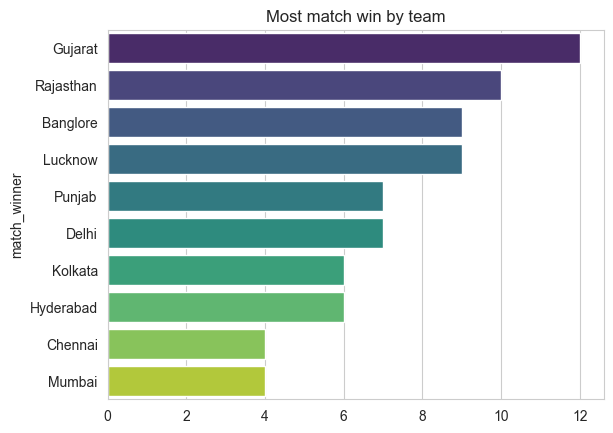

In [23]:
# mask=df['match_winner'].value_counts().idxmax()
# print(mask)
x=df['match_winner'].value_counts()
sns.barplot(x=x.values,y=x.index,palette='viridis')
plt.title("Most match win by team")

Toss Decision trend

Text(0.5, 1.0, 'Toss decision Trends')

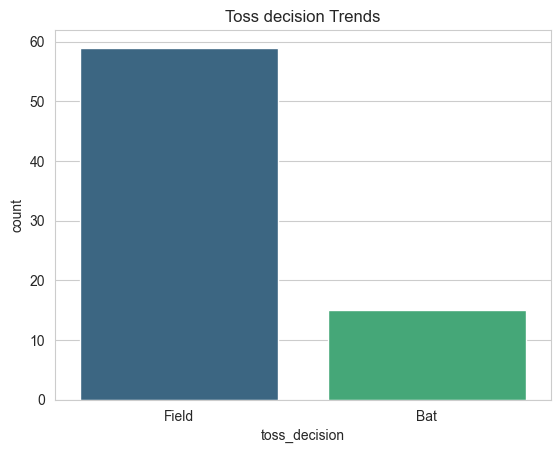

In [30]:
sns.countplot(x='toss_decision',data=df,palette='viridis')
plt.title('Toss decision Trends')

Toss winner vs match winner

In [6]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count/df.shape[0])*100
percentage.round(2)#round to 2 decimal places 

np.float64(48.65)

how do teams won runs or wickets?

<Axes: xlabel='won_by', ylabel='count'>

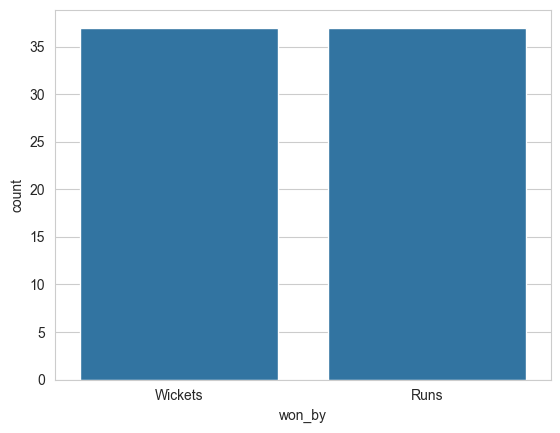

In [7]:
sns.countplot(x='won_by',data=df)

<Axes: ylabel='player_of_the_match'>

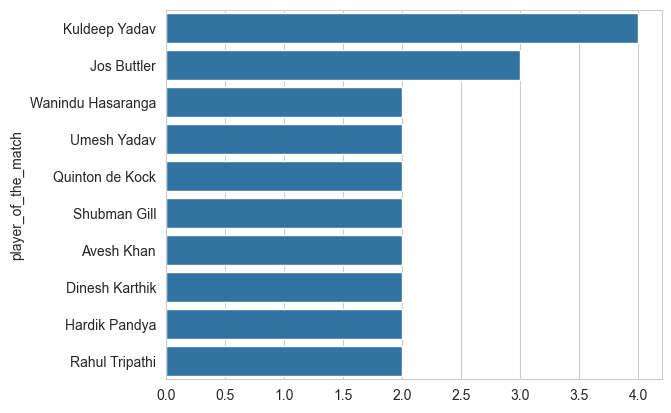

In [20]:
chart = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x=chart.values,y=chart.index)

<Axes: xlabel='top_scorer'>

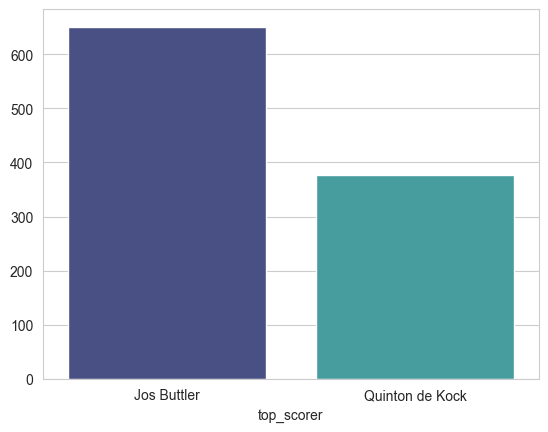

In [41]:
# top 2 scoreres
count = df.groupby(['top_scorer'])['highscore'].sum().sort_values(ascending=False).head(2)
sns.barplot(x=count.index,y=count.values,palette='mako')
# The index is the unique values (e.g., names like 'Akshit', 'Parika', 'Chaudhary')
# The values are their counts (e.g., how many times each name appeared)

<Axes: ylabel='best_bowling'>

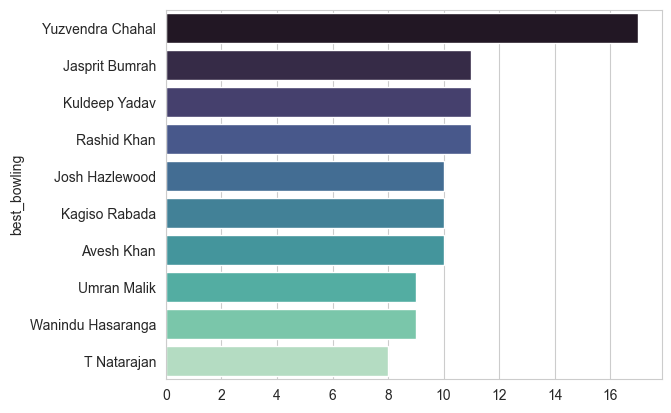

In [51]:
# 10 best bowling figures
#extracting only the wickets
# df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets']=df['highest_wickets'].astype(int)
bowler = df.groupby(['best_bowling'])['highest_wickets'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=bowler.values,y=bowler.index,palette='mako')

<Axes: ylabel='venue'>

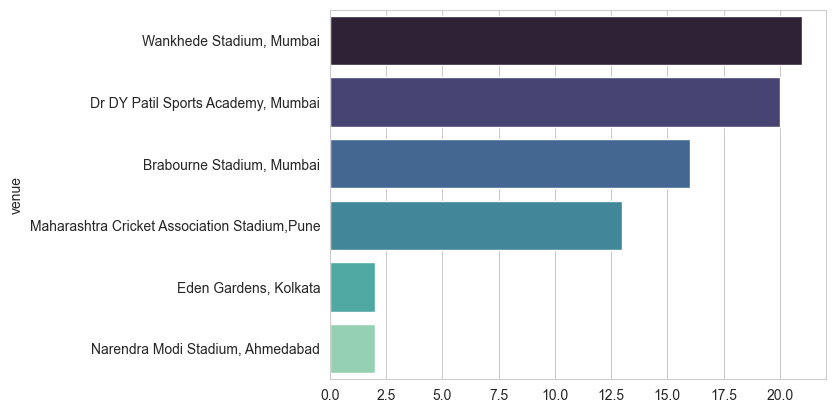

In [54]:
#most match played by venue
stadium = df['venue'].value_counts()
sns.barplot(x=stadium.values,y=stadium.index,palette='mako')

In [66]:
#who won the highest margin by runs
df[df['won_by'] == 'Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]


,match_winner,margin
54,Chennai,91
